In [4]:
# Goal is to predict survival chance of titanic passengers
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [6]:
t_df = pd.read_csv('titanic_data.csv', index_col='PassengerId') 
#the "PassengerId" column will be used as the row labels for the DataFrame, and it won't appear as a regular data column in the DataFrame.

In [7]:
t_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
t_df = t_df.dropna() # Removes all rows with at least one NAN

# Drop some irrelevant columns
t_df.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)

# convert non-numeric cols to numeric ones
t_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
t_df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

/var/folders/17/lm66lz8x3jd4gncs8cp7py3h0000gq/T/ipykernel_40950/997648883.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df.drop(columns=['Name', 'Cabin', 'Ticket'], inplace=True)
/var/folders/17/lm66lz8x3jd4gncs8cp7py3h0000gq/T/ipykernel_40950/997648883.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['Sex'].replace(['male', 'female'], [1, 0], inplace=True)
/var/folders/17/lm66lz8x3jd4gncs8cp7py3h0000gq/T/ipykernel_40950/997648883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [9]:
X = t_df.drop(columns=['Survived']) # predictors (independent variables)
y = t_df['Survived'] # labels (dependent variables)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # 30% of the data will be for testing

# training logistic regression model
# sm.add_constant outputs the same predictors with an extra column of 1's since we have an intercept (bias)
logmodel = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=False)  

print(logmodel.summary())  # variables with large p-values such as Parch, Fare and Embarked aren't relevant to prediction

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  128
Model:                          Logit   Df Residuals:                      120
Method:                           MLE   Df Model:                            7
Date:                Tue, 10 Oct 2023   Pseudo R-squ.:                  0.2987
Time:                        13:57:04   Log-Likelihood:                -56.809
converged:                       True   LL-Null:                       -81.004
Covariance Type:            nonrobust   LLR p-value:                 2.988e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2781      1.299      3.293      0.001       1.732       6.824
Pclass        -0.2380      0.502     -0.474      0.635      -1.221       0.745
Sex           -3.0960      0.664     -4.663      0.0

In [12]:
# Form our predictions, convert continuous [0, 1] predictions to binary
predictions = logmodel.predict(sm.add_constant(X_test))  
bin_predictions = [1 if x >= 0.5 else 0 for x in predictions]

# We can now assess the accuracy and print out the confusion matrix
print(accuracy_score(y_test, bin_predictions))
print(confusion_matrix(y_test, bin_predictions))

0.7636363636363637
[[12  6]
 [ 7 30]]


In [29]:
predictions.iloc[:5]

PassengerId
821    0.892508
346    0.954959
584    0.525488
790    0.464509
708    0.411466
dtype: float64

Text(0, 0.5, 'True Positive Rate')

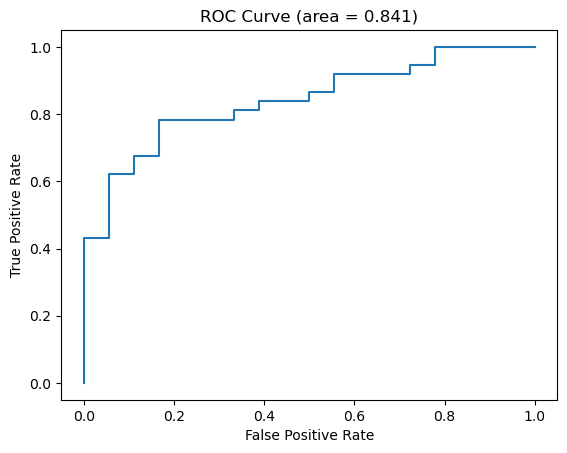

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

plt.plot(fpr, tpr, label='ROC Curve (area = %0.3f)' % roc_auc)
plt.title('ROC Curve (area = %0.3f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [2]:
import logistic_regression_class as lrc

In [ ]:
logmodel = 